In [7]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel="ibm_quantum",
    token="0a2449f2c0070d110881d23f1901b55b4fa28bb4979ef64088d971415bc21f09623ab31a26458d0d53d2e563bb5d74af854c90ead93b2bda8f70f81cc0066ee8",
)
backend = service.least_busy(operational=True, simulator=False)

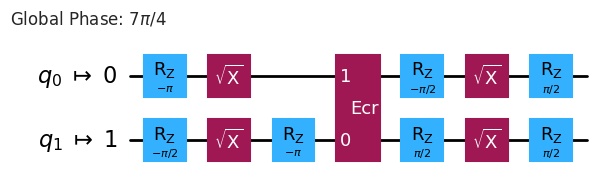

In [8]:
from qiskit import QuantumRegister, QuantumCircuit
from qiskit.compiler import transpile

qubits = QuantumRegister(2, name="q")
qc = QuantumCircuit(qubits)

qc.h(qubits[0])
qc.cx(qubits[0], qubits[1])

isa_circuit = transpile(qc, backend)

isa_circuit.draw(output="mpl", idle_wires=False)

In [11]:
import qiskit.quantum_info as qi

observables = qi.SparsePauliOp(["ZZ"])

# transpile to isa observable for intended isa circuit
isa_observables = observables.apply_layout(isa_circuit.layout)

In [20]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator


estimator = Estimator(backend=backend)
pub = (isa_circuit, isa_observables)
job = estimator.run([pub])
result = job.result()[0]
data = result.data
evs = data.evs
stds = data.stds
print(f"<ZZ> = {evs[0]:.3f} ± {stds[0]:.3f}")

<ZZ> = 1.007 ± 0.014
